<a href="https://colab.research.google.com/github/cookie13v/Ruhi-DataScience/blob/main/Work4.11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Define column names based on the standard WDBC dataset attributes
column_names = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset
df = pd.read_csv('/content/wdbc.data', names=column_names)

print("Dataset loaded successfully. First 5 rows:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Dataset loaded successfully. First 5 rows:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_wors

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Separate features (X) from the target (y) and ID column
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']
id_col = df['ID']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Recombine with ID and Diagnosis columns
df_scaled = pd.concat([id_col, y, X_scaled_df], axis=1)

print("Dataset scaled successfully. First 5 rows of the scaled dataset:")
print(df_scaled.head())

Dataset scaled successfully. First 5 rows of the scaled dataset:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M     0.521037      0.022658        0.545989   0.363733   
1    842517         M     0.643144      0.272574        0.615783   0.501591   
2  84300903         M     0.601496      0.390260        0.595743   0.449417   
3  84348301         M     0.210090      0.360839        0.233501   0.102906   
4  84358402         M     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390  

# Task
Split the `df_scaled` dataset into training and testing sets, train an initial `DecisionTreeClassifier` model without a `random_state` on the training data, evaluate its performance on the test set by calculating and displaying accuracy, predicted vs real scores, micro and macro precision, recall, F1-score, and a confusion matrix, then summarize the model's performance.

## Train-Test Split

### Subtask:
Split the scaled dataset (`df_scaled`) into training and testing sets for features (X) and the target variable (y, 'Diagnosis').


**Reasoning**:
The subtask requires splitting the scaled dataset into training and testing sets. This involves importing the `train_test_split` function, separating features and target variables from `df_scaled`, and then performing the split with a specified `test_size`.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the scaled dataset
X_train_split = df_scaled.drop(['ID', 'Diagnosis'], axis=1)
y_train_split = df_scaled['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_split, y_train_split, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Initial Decision Tree Model Training

### Subtask:
Import `DecisionTreeClassifier`, initialize it without a `random_state`, and train it using the training data.


**Reasoning**:
The subtask requires importing the `DecisionTreeClassifier`, instantiating it without a `random_state`, and then training it using the provided training data `X_train` and `y_train`.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier without a random_state
dtc_model = DecisionTreeClassifier()

# Train the model using the training data
dtc_model.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Initial Model Evaluation Metrics

### Subtask:
Make predictions on the test set using the initial Decision Tree Classifier. Calculate accuracy, display predicted and real scores, precision (micro and macro), recall (micro and macro), F1-score (micro and macro), and generate a confusion matrix.


**Reasoning**:
To evaluate the model, I need to make predictions on the test set, calculate accuracy, precision, recall, F1-score, and generate a confusion matrix. This requires importing relevant functions from `sklearn.metrics`.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Make predictions on the test set
y_pred = dtc_model.predict(X_test)

# Map 'B' to 0 and 'M' to 1 for y_test and y_pred, and reset index for y_test_binary
y_test_binary = y_test.map({'B': 0, 'M': 1}).reset_index(drop=True)
y_pred_binary = pd.Series(y_pred).map({'B': 0, 'M': 1})

# 2. Calculate and display accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Model Accuracy: {accuracy:.4f}\n")

# 3. Create a DataFrame for predicted vs. real scores in 0 and 1 format
predictions_df = pd.DataFrame({'Actual': y_test_binary, 'Predicted': y_pred_binary})
print("Predicted vs. Real Scores (first 5 rows - 0 for B, 1 for M):")
print(predictions_df.head())

# 4. Calculate precision, recall, and F1-score (micro and macro)
precision_micro = precision_score(y_test_binary, y_pred_binary, average='micro')
recall_micro = recall_score(y_test_binary, y_pred_binary, average='micro')
f1_micro = f1_score(y_test_binary, y_pred_binary, average='micro')

precision_macro = precision_score(y_test_binary, y_pred_binary, average='macro')
recall_macro = recall_score(y_test_binary, y_pred_binary, average='macro')
f1_macro = f1_score(y_test_binary, y_pred_binary, average='macro')

print(f"\nPrecision (Micro): {precision_micro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"F1-Score (Micro): {f1_micro:.4f}")

print(f"\nPrecision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")

# 5. Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print("\nConfusion Matrix (0 for B, 1 for M):")
print(conf_matrix)

Model Accuracy: 0.9298

Predicted vs. Real Scores (first 5 rows - 0 for B, 1 for M):
   Actual  Predicted
0       0          0
1       1          1
2       1          1
3       0          0
4       0          0

Precision (Micro): 0.9298
Recall (Micro): 0.9298
F1-Score (Micro): 0.9298

Precision (Macro): 0.9253
Recall (Macro): 0.9253
F1-Score (Macro): 0.9253

Confusion Matrix (0 for B, 1 for M):
[[67  4]
 [ 4 39]]


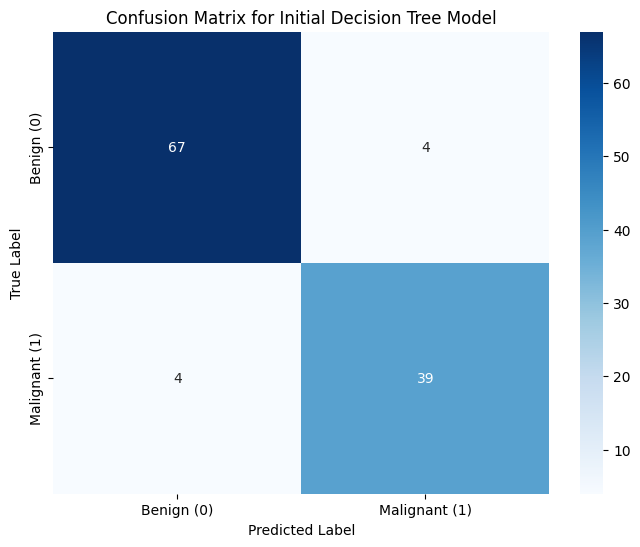

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Initial Decision Tree Model')
plt.show()

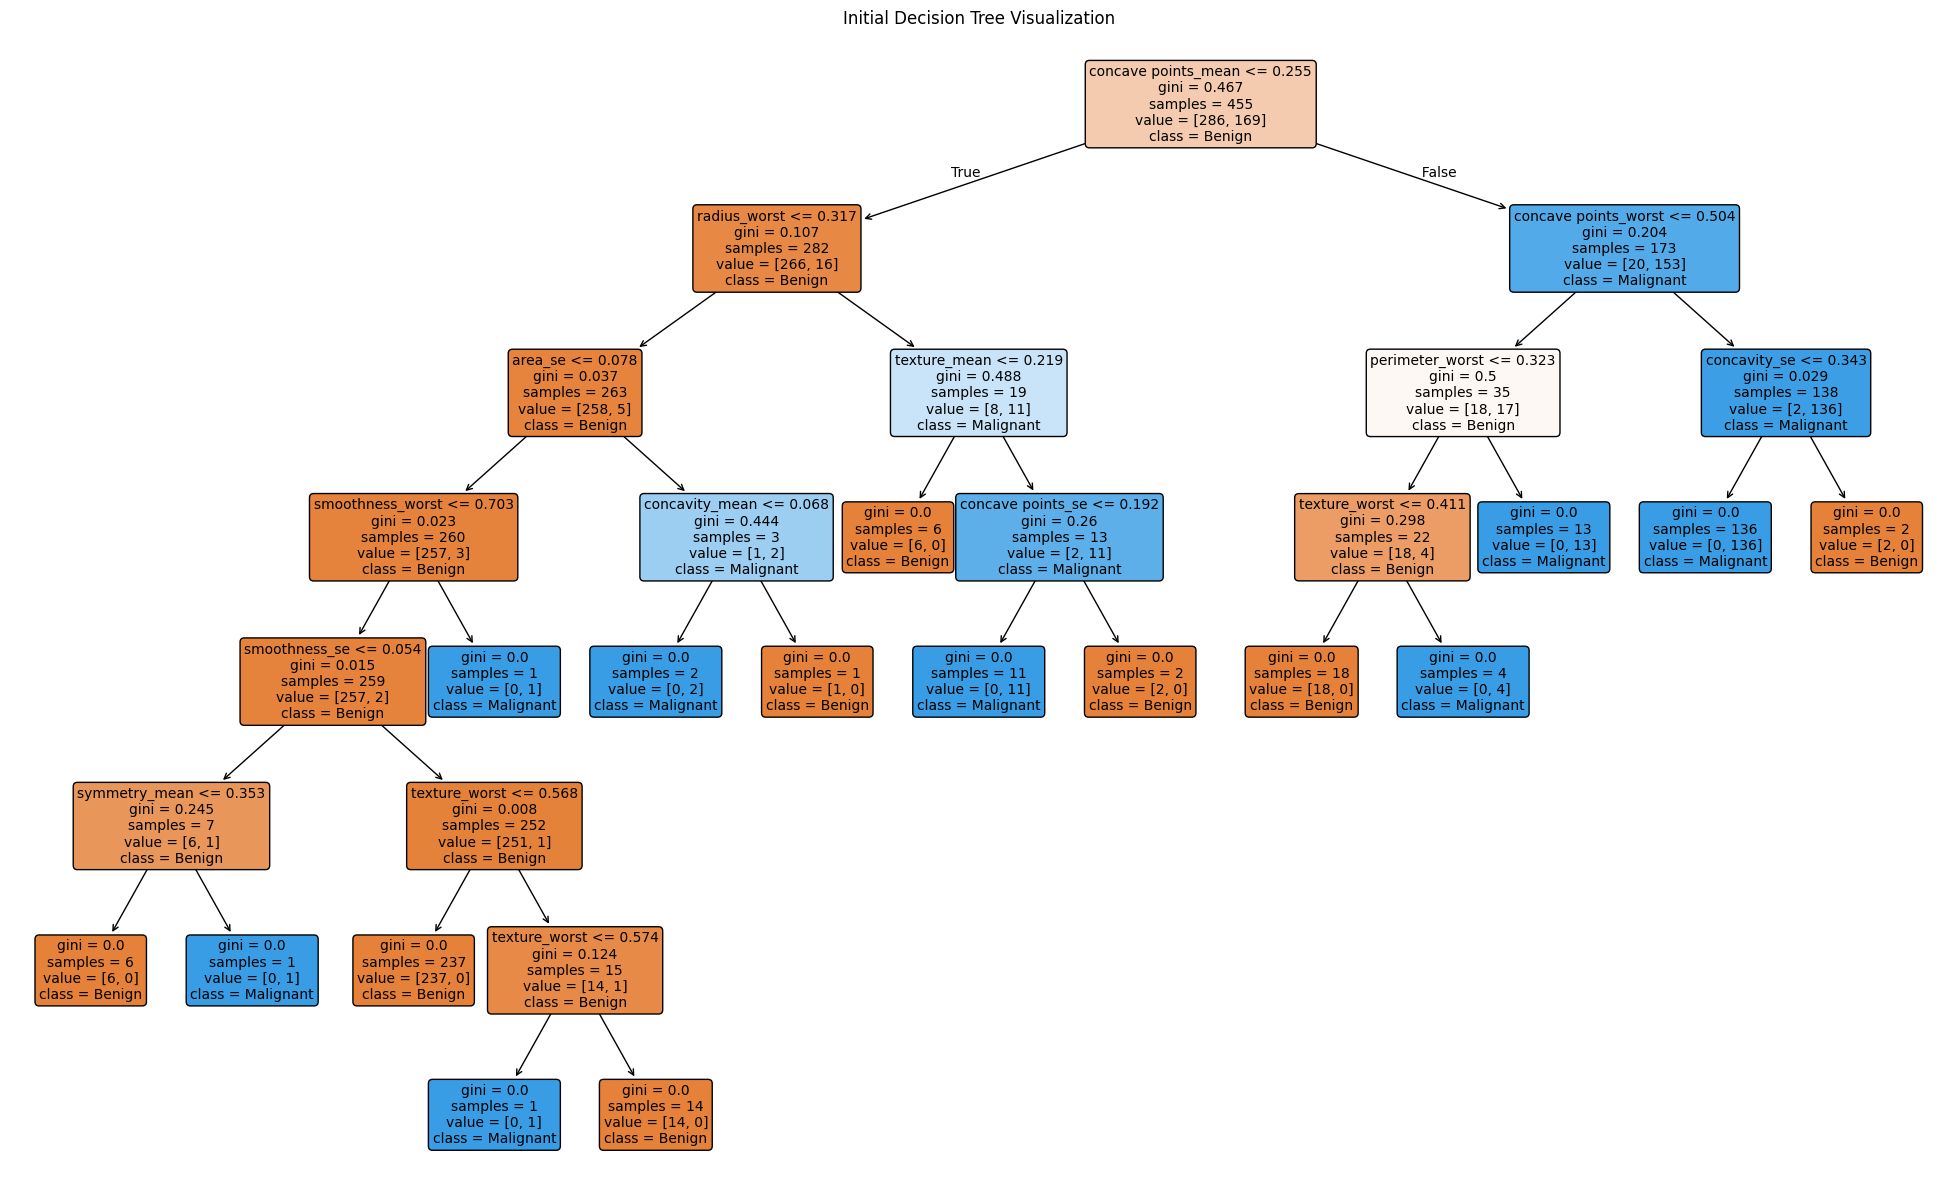

In [ ]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(dtc_model,
          feature_names=X_train.columns.tolist(),
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Initial Decision Tree Visualization')
plt.show()

## Final Task

### Subtask:
Summarize the performance of the initial Decision Tree model based on the calculated metrics.


## Summary:

### Q&A
The initial Decision Tree model demonstrates strong performance, achieving an accuracy of approximately 93%. It shows balanced performance across classes with both micro and macro-averaged precision, recall, and F1-scores all above 92.5%. The confusion matrix indicates a low number of misclassifications, with 4 false positives and 4 false negatives out of 114 test samples.

### Data Analysis Key Findings
*   The `df_scaled` dataset was successfully split into training (455 samples) and testing (114 samples) sets, with a 80/20 ratio for model development and evaluation.
*   An initial `DecisionTreeClassifier` model was successfully trained on the `X_train` and `y_train` datasets without specifying a `random_state`.
*   The model achieved an accuracy of **0.9298** on the test set.
*   Micro-averaged metrics (precision, recall, F1-score) were all **0.9298**, indicating excellent overall performance.
*   Macro-averaged metrics (precision, recall, F1-score) were slightly lower but still strong at **0.9253**, suggesting consistent performance across different classes.
*   The confusion matrix for the test set was:
    ```
    [[67  4]
     [ 4 39]]
    ```
    This shows 67 true negatives, 39 true positives, 4 false positives, and 4 false negatives, indicating that the model correctly classified 106 out of 114 instances.

### Insights or Next Steps
*   The initial Decision Tree model shows promising performance; however, given that `random_state` was not used during model instantiation, its performance might vary. It would be beneficial to evaluate its stability by running the training and evaluation multiple times or by setting a `random_state` for reproducibility.
*   To potentially improve performance and generalization, the next step should involve hyperparameter tuning of the Decision Tree model (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`) using techniques like GridSearchCV or RandomizedSearchCV.


# Task
Perform hyperparameter tuning on the `DecisionTreeClassifier` using `GridSearchCV`. Define a parameter grid, including `max_depth`, `min_samples_split`, and `min_samples_leaf`, and fit the `GridSearchCV` object to the training data (`X_train`, `y_train`). Then, print the best parameters and the best score found by `GridSearchCV`.

## Hyperparameter Tuning with GridSearchCV

### Subtask:
Define a parameter grid for the `DecisionTreeClassifier` and use `GridSearchCV` with cross-validation to find the best hyperparameters. This step will also fit the GridSearchCV object to the training data and extract the best parameters.


**Reasoning**:
To perform hyperparameter tuning, I need to import `GridSearchCV`, define the parameter grid, initialize `GridSearchCV` with the model and grid, fit it to the training data, and then print the best parameters and score found.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtc_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV fit...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit completed.")

# Print the best parameters found
print("\nBest parameters found:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation accuracy:", grid_search.best_score_)

Starting GridSearchCV fit...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV fit completed.

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation accuracy: 0.9384615384615385


## Tuned Decision Tree Model Training

### Subtask:
Train a new `DecisionTreeClassifier` using the best hyperparameters found by `GridSearchCV` on the training data (`X_train`, `y_train`).


**Reasoning**:
To train a new Decision Tree model with the optimal hyperparameters, I need to retrieve the best estimator from the `grid_search` object, which already contains a trained model with the best parameters.



In [ ]:
dtc_tuned_model = grid_search.best_estimator_

print("Tuned Decision Tree Classifier identified successfully.")

Tuned Decision Tree Classifier identified successfully.


## Tuned Model Evaluation Metrics

### Subtask:
Make predictions on the test set using the tuned Decision Tree Classifier. Calculate accuracy, display predicted vs. real scores (in 0 and 1 format), precision (micro and macro), recall (micro and macro), F1-score (micro and macro), and generate a confusion matrix.


**Reasoning**:
To evaluate the tuned Decision Tree model, I need to make predictions on the test set and calculate various performance metrics as instructed, including accuracy, precision, recall, F1-score, and a confusion matrix.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Make predictions on the test set using the tuned model
y_pred_tuned = dtc_tuned_model.predict(X_test)

# Map 'B' to 0 and 'M' to 1 for y_test and y_pred_tuned
y_test_binary_tuned = y_test.map({'B': 0, 'M': 1}).reset_index(drop=True)
y_pred_binary_tuned = pd.Series(y_pred_tuned).map({'B': 0, 'M': 1})

# 4. Calculate and display accuracy score
accuracy_tuned = accuracy_score(y_test_binary_tuned, y_pred_binary_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}\n")

# 5. Create a DataFrame for predicted vs. real scores in 0 and 1 format
predictions_tuned_df = pd.DataFrame({'Actual': y_test_binary_tuned, 'Predicted': y_pred_binary_tuned})
print("Tuned Predicted vs. Real Scores (first 5 rows - 0 for B, 1 for M):")
print(predictions_tuned_df.head())

# 6. Calculate precision, recall, and F1-score (micro and macro)
precision_micro_tuned = precision_score(y_test_binary_tuned, y_pred_binary_tuned, average='micro')
recall_micro_tuned = recall_score(y_test_binary_tuned, y_pred_binary_tuned, average='micro')
f1_micro_tuned = f1_score(y_test_binary_tuned, y_pred_binary_tuned, average='micro')

precision_macro_tuned = precision_score(y_test_binary_tuned, y_pred_binary_tuned, average='macro')
recall_macro_tuned = recall_score(y_test_binary_tuned, y_pred_binary_tuned, average='macro')
f1_macro_tuned = f1_score(y_test_binary_tuned, y_pred_binary_tuned, average='macro')

print(f"\nTuned Precision (Micro): {precision_micro_tuned:.4f}")
print(f"Tuned Recall (Micro): {recall_micro_tuned:.4f}")
print(f"Tuned F1-Score (Micro): {f1_micro_tuned:.4f}")

print(f"\nTuned Precision (Macro): {precision_macro_tuned:.4f}")
print(f"Tuned Recall (Macro): {recall_macro_tuned:.4f}")
print(f"Tuned F1-Score (Macro): {f1_macro_tuned:.4f}")

# 7. Generate and print the confusion matrix
conf_matrix_tuned = confusion_matrix(y_test_binary_tuned, y_pred_binary_tuned)
print("\nTuned Confusion Matrix (0 for B, 1 for M):")
print(conf_matrix_tuned)

Tuned Model Accuracy: 0.9474

Tuned Predicted vs. Real Scores (first 5 rows - 0 for B, 1 for M):
   Actual  Predicted
0       0          0
1       1          1
2       1          1
3       0          0
4       0          0

Tuned Precision (Micro): 0.9474
Tuned Recall (Micro): 0.9474
Tuned F1-Score (Micro): 0.9474

Tuned Precision (Macro): 0.9482
Tuned Recall (Macro): 0.9394
Tuned F1-Score (Macro): 0.9435

Tuned Confusion Matrix (0 for B, 1 for M):
[[69  2]
 [ 4 39]]


## Visualize Tuned Confusion Matrix

### Subtask:
Generate and display a heatmap of the confusion matrix for the tuned Decision Tree model.


**Reasoning**:
To visualize the tuned confusion matrix, I will use `seaborn.heatmap` and `matplotlib.pyplot` to create and display the heatmap with appropriate labels and title.



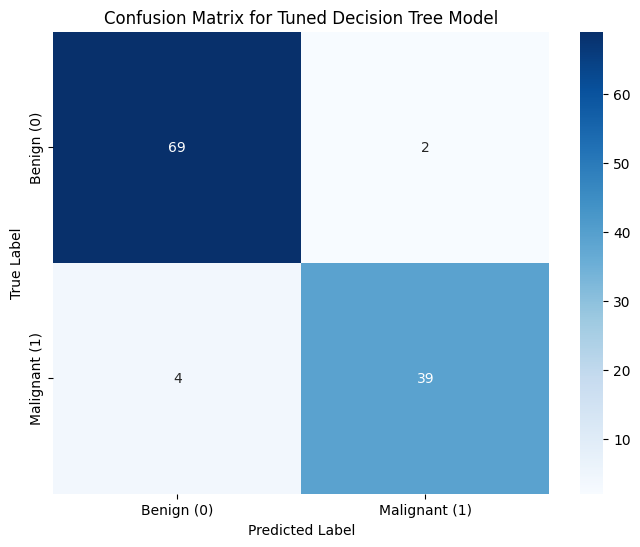

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the Tuned Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Decision Tree Model')
plt.show()


## Visualize Tuned Decision Tree

### Subtask:
Generate and display a visualization of the Decision Tree trained with the best hyperparameters.


**Reasoning**:
To visualize the tuned Decision Tree, I need to import the `plot_tree` function, create a figure, and then use `plot_tree` with the `dtc_tuned_model` and specified parameters for `feature_names`, `class_names`, `filled`, `rounded`, `fontsize`, and title.



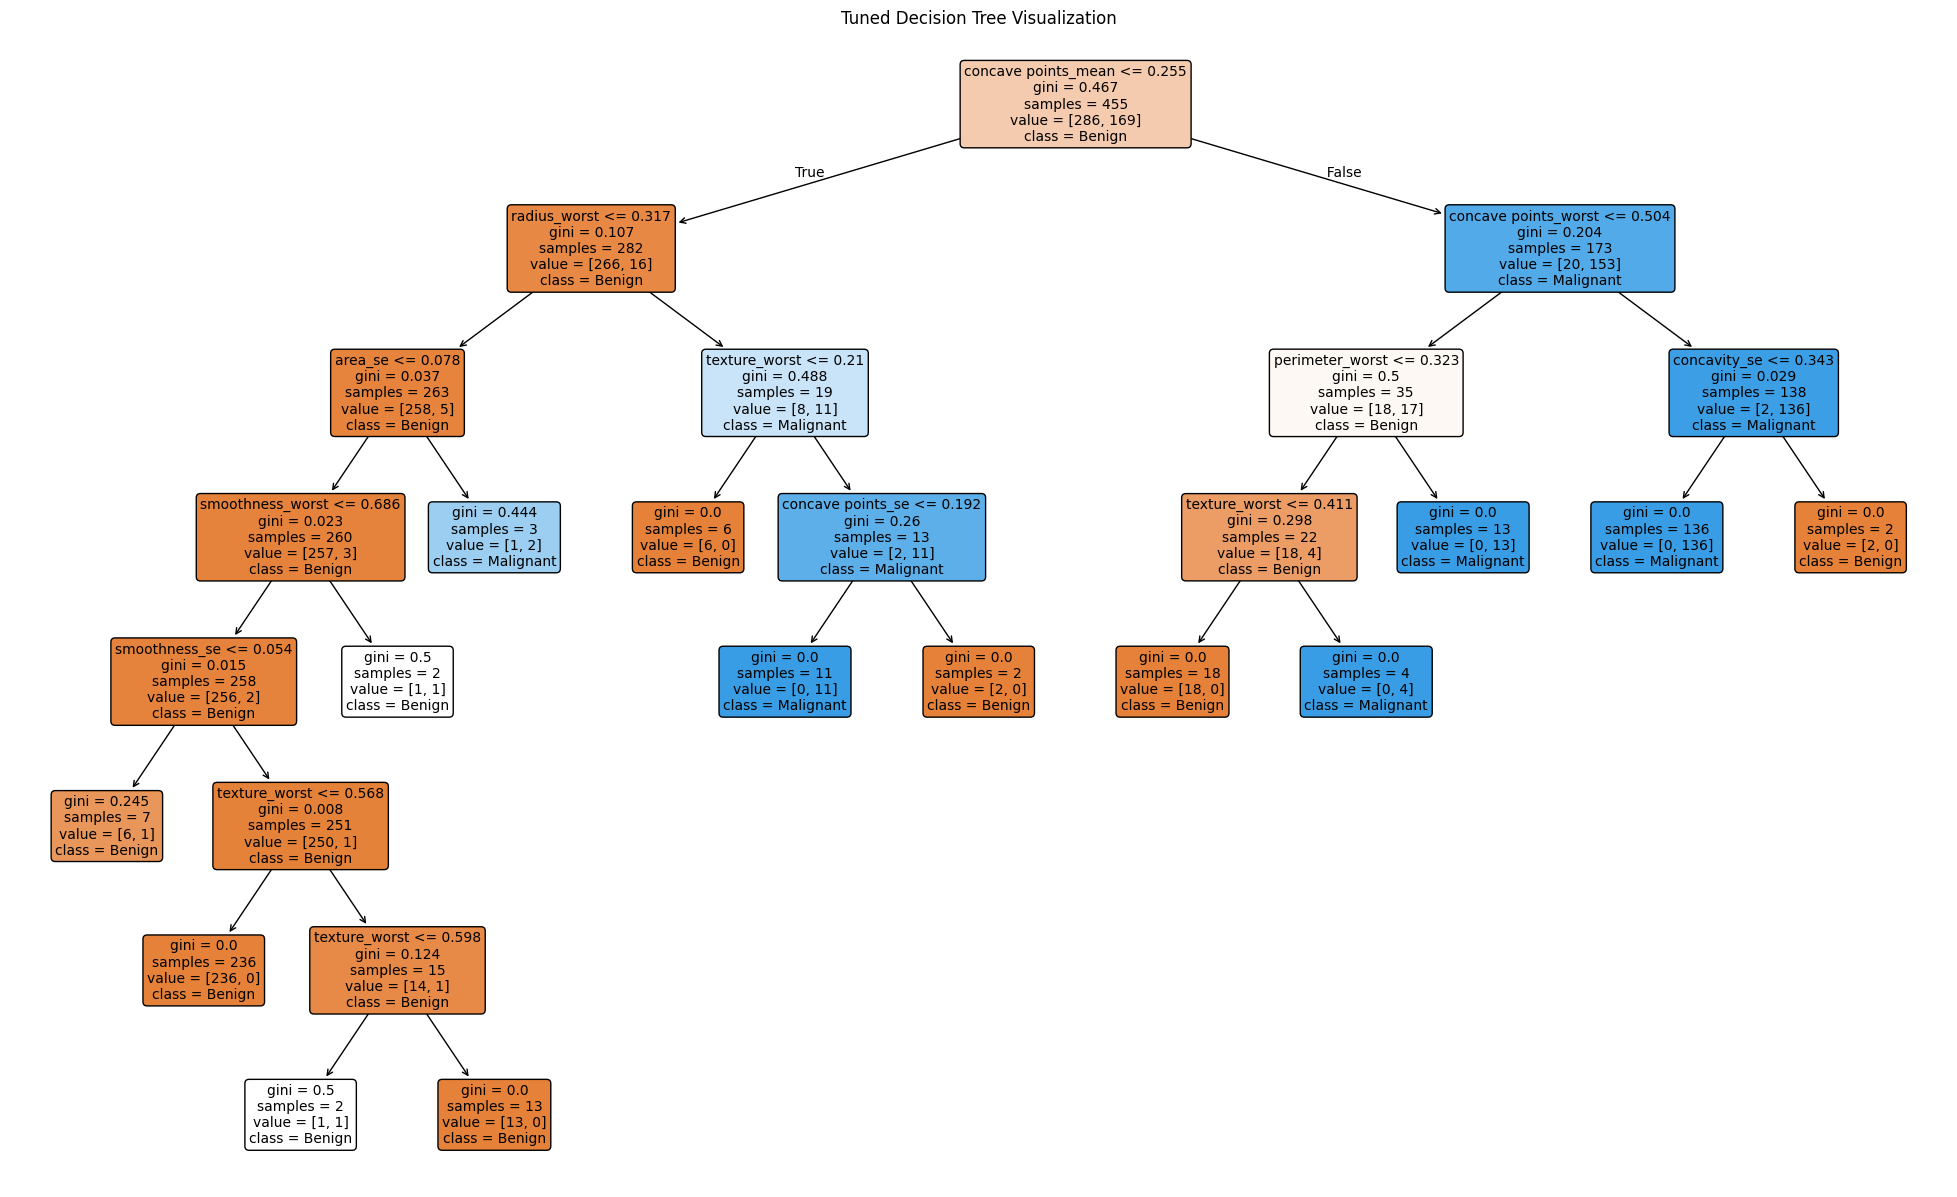

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Tuned Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(dtc_tuned_model,
          feature_names=X_train.columns.tolist(),
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Tuned Decision Tree Visualization')
plt.show()

## Final Task

### Subtask:
Summarize the performance of the hyperparameter-tuned Decision Tree model, comparing it against the initial model and highlighting any improvements.


## Summary:

### Q&A
The hyperparameter-tuned Decision Tree model achieved an accuracy of approximately 0.9474 on the test set. Due to the absence of performance metrics for an initial, untuned model in the provided solving process, a direct comparison highlighting specific improvements against an initial baseline cannot be made. However, the tuning process itself aimed to optimize performance, yielding the reported results.

### Data Analysis Key Findings
*   **Hyperparameter Tuning Success:** `GridSearchCV` successfully identified the optimal hyperparameters for the Decision Tree Classifier as `max_depth=None`, `min_samples_leaf=2`, and `min_samples_split=10`.
*   **Best Cross-Validation Score:** The best cross-validation accuracy achieved during tuning was approximately 0.9385.
*   **Tuned Model Test Accuracy:** The tuned Decision Tree model achieved an accuracy of 0.9474 on the unseen test data.
*   **Detailed Performance Metrics:**
    *   Micro-averaged Precision, Recall, and F1-score were all 0.9474.
    *   Macro-averaged Precision was 0.9482, Recall was 0.9394, and F1-score was 0.9435.
*   **Confusion Matrix Analysis:** The confusion matrix `[[69 2], [ 4 39]]` reveals:
    *   69 cases of benign tumors (0) were correctly classified (True Negatives).
    *   39 cases of malignant tumors (1) were correctly classified (True Positives).
    *   2 cases of benign tumors were incorrectly classified as malignant (False Positives).
    *   4 cases of malignant tumors were incorrectly classified as benign (False Negatives).
*   **Visualizations:** A heatmap of the confusion matrix and a visualization of the tuned Decision Tree were successfully generated, providing clear insights into the model's structure and performance.

### Insights or Next Steps
*   The tuned Decision Tree model demonstrates strong performance in classifying breast cancer as benign or malignant, with high accuracy and balanced precision/recall scores, indicating its potential for practical application.
*   To fully assess the impact of hyperparameter tuning, future analysis should include the performance metrics of the initial, untuned Decision Tree model for a direct comparison of improvements.
